In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the cleaned data
df1 = pd.read_csv("clean_data.csv")

In [3]:
# Checking the data
df1.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [4]:
# Checking shape
df1.shape

(2620, 8)

In [5]:
# Checking datatypes and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [6]:
# Filling null with -1
df1["bathroom"].fillna(-1, inplace = True)
df1["age"].fillna(-1, inplace = True)

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.83,42.0,61.735,90.00,1422.0
area,2620.0,1282.925191,692.566319,300.00,877.0,1091.500,1471.25,6700.0
bhk,2620.0,2.443893,0.811984,1.00,2.0,2.000,3.00,8.0
bathroom,2620.0,0.798855,1.786098,-1.00,-1.0,1.000,2.00,7.0
age,2620.0,0.554198,2.040194,-1.00,-1.0,0.000,1.00,32.0


In [8]:
# Function to add missing bathroom values
def bath_finder(x,y):
    if y == -1:
        if x >= 5:
            return x+1
        elif x == 4 | x == 3:
            return  x
        elif x == 1:
            return x
        else:
            return x-1
    else:
        return y
    
df1["bath"] = df1.apply(lambda x: bath_finder(x["bhk"], x["bathroom"]), axis = 1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
 8   bath      2620 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 184.3+ KB


In [10]:
df1.head()

,price,area,status,bhk,bathroom,age,location,builder,bath
0,37.49,872,Ready to move,2,-1.0,1.0,Sembakkam,MP Developers,1.0
1,93.54,1346,Under Construction,3,2.0,-1.0,Selaiyur,DAC Promoters,2.0
2,151.00,2225,Under Construction,3,-1.0,0.0,Mogappair,Casagrand Builder Private Limited,2.0
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders,2.0
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd,1.0


In [11]:
# Function to add missing age values
def age_finder(x):
    if x == -1:
        return 0
    else:
        return x
df1['year'] = df1['age'].apply(age_finder)

In [12]:
df1.head()

,price,area,status,bhk,bathroom,age,location,builder,bath,year
0,37.49,872,Ready to move,2,-1.0,1.0,Sembakkam,MP Developers,1.0,1.0
1,93.54,1346,Under Construction,3,2.0,-1.0,Selaiyur,DAC Promoters,2.0,0.0
2,151.00,2225,Under Construction,3,-1.0,0.0,Mogappair,Casagrand Builder Private Limited,2.0,0.0
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders,2.0,3.0
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd,1.0,0.0


In [13]:
# Dropping old columns
df1.drop(['bathroom','age'],axis=1,inplace=True)

In [14]:
df1.head()

,price,area,status,bhk,location,builder,bath,year
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1.0,1.0
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,2.0,0.0
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,2.0,0.0
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders,2.0,3.0
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,1.0,0.0


In [15]:
df1['bhk'].unique()

array([2, 3, 4, 1, 5, 6, 8], dtype=int64)

In [16]:
df1['bath'].unique()

array([1., 2., 3., 4., 6., 5., 7.])

In [17]:
df1['year'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [18]:
df1['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [19]:
df1['location'].unique()

array(['Sembakkam', 'Selaiyur', 'Mogappair', 'Ambattur', 'Pallavaram',
       'Virugambakkam', 'Thirumazhisai', 'Moolakadai', 'Ottiyambakkam',
       'Perungalathur', 'Gerugambakkam', 'Anna Nagar', 'Gopalapuram',
       'Pammal', 'Porur', 'Navallur', 'Sholinganallur', 'Vanagaram',
       'T Nagar', 'Guindy', 'Madipakkam', 'Perumbakkam', 'Velachery',
       'Medavakkam', 'Gowrivakkam', 'Chromepet', 'Thalambur', 'Thandalam',
       'Ayanambakkam', 'Kanathur Reddikuppam', 'Adyar', 'Kolapakkam',
       'Thaiyur', 'Thoraipakkam OMR', 'Poonamallee', 'Padur',
       'East Tambaram', 'Tiruvottiyur', 'Iyappanthangal', 'Padappai',
       'Mugalivakkam', 'Kelambakkam', 'Thirumullaivoyal', 'Madhavaram',
       'Kundrathur', 'Vengaivasal', 'Siruseri', 'Manapakkam',
       'Karapakkam', 'Sithalapakkam', 'Madambakkam', 'Perungudi',
       'Vadapalani', 'Alwarpet', 'Thiruvidandhai', 'Kotturpuram',
       'Velappanchavadi', 'Kilpauk', 'Besant Nagar', 'Vellakkal', 'Avadi',
       'Kolathur', 'Thiruvanmi

In [20]:
df1['builder'].unique()

array(['MP Developers', 'DAC Promoters',
       'Casagrand Builder Private Limited', 'Dugar Housing Builders',
       'Radiance Realty Developers India Ltd', 'Traventure Homes Pvt Ltd',
       'Urbanrise', 'Navin Housing Properties P LTD',
       'Jones foundation private limited', 'Isha Homes',
       'Kochar Homes Pvt Ltd', 'Pushkar Properties Pvt Ltd',
       'Asset Tree Homes', 'Urban Tree Infrastructures', 'Olympia Group',
       'Vijay Raja Homes Private Limited', 'Kamalam Builder Pvt Ltd',
       'Appaswamy Real Estate', 'VNR Homes', 'PS Srijan Developers',
       'Lifestyle Housing', 'Puravankara Limited', 'Jones Foundations',
       'Plaza Group', 'Urbando Housing LLP', 'EK Realtors',
       'The Nest Builder', 'Doshi Housing', 'Grandstyle constructions',
       'vinoth builders', 'GTK Foundations', 'Baashyaam Group', 'chris',
       'Krishna Constructions', 'AKS Housing Dedvelopment Pvt Ltd',
       'Mayances Construction and Engineering Services',
       'Ramaniyam Real Esta

In [21]:
df1['location'].value_counts()

Veppampattu         149
Pammal              139
Medavakkam          111
Sholinganallur       99
Perungudi            88
                   ... 
Jeth Nagar            1
Sevvapet              1
Gokulapuram           1
Iyyapa Nagar          1
Kil Ayanambakkam      1
Name: location, Length: 178, dtype: int64

In [22]:
df1['builder'].value_counts()

seller                               484
MC Foundation                        232
Appaswamy Real Estate                109
Propsource Realty Private Limited     79
Radiance Realty Developers            62
                                    ... 
Prop Mart Technologies                 1
S Suresh Kumar                         1
Yadhav constructions real estates      1
MAXWORTH PROPERTIES                    1
Evrostos Properties                    1
Name: builder, Length: 135, dtype: int64

In [23]:
location_stats = df1['location'].value_counts(ascending=False)
location_stats

Veppampattu         149
Pammal              139
Medavakkam          111
Sholinganallur       99
Perungudi            88
                   ... 
Jeth Nagar            1
Sevvapet              1
Gokulapuram           1
Iyyapa Nagar          1
Kil Ayanambakkam      1
Name: location, Length: 178, dtype: int64

In [24]:
location_stats.values.sum()

2620

In [25]:
len(location_stats[location_stats>10])

59

In [26]:
len(location_stats)

178

In [27]:
len(location_stats[location_stats<=10])

119

In [28]:
# Storing locations with less than 10 count
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ambattur INDUSTRIAL ESTATE    10
Thandalam                     10
Urapakkam                     10
Saidapet                       9
Kilpauk                        9
                              ..
Jeth Nagar                     1
Sevvapet                       1
Gokulapuram                    1
Iyyapa Nagar                   1
Kil Ayanambakkam               1
Name: location, Length: 119, dtype: int64

In [29]:
# Grouping all less than 10 locations as other
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

60

In [30]:
df1.head(10)

,price,area,status,bhk,location,builder,bath,year
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1.0,1.0
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,2.0,0.0
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,2.0,0.0
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders,2.0,3.0
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,1.0,0.0
5,188.00,2221,Under Construction,3,other,Traventure Homes Pvt Ltd,3.0,0.0
6,38.00,885,Under Construction,3,Thirumazhisai,Urbanrise,2.0,0.0
7,72.99,936,Ready to move,3,other,Navin Housing Properties P LTD,2.0,6.0
8,125.00,2275,Ready to move,4,other,Jones foundation private limited,3.0,1.0
9,24.56,622,Under Construction,2,Perungalathur,Isha Homes,1.0,0.0


In [31]:
builder_stats = df1['builder'].value_counts(ascending=False)
builder_stats

seller                               484
MC Foundation                        232
Appaswamy Real Estate                109
Propsource Realty Private Limited     79
Radiance Realty Developers            62
                                    ... 
Prop Mart Technologies                 1
S Suresh Kumar                         1
Yadhav constructions real estates      1
MAXWORTH PROPERTIES                    1
Evrostos Properties                    1
Name: builder, Length: 135, dtype: int64

In [32]:
builder_stats.values.sum()

2620

In [33]:
len(builder_stats[builder_stats>10])

56

In [34]:
len(builder_stats)

135

In [35]:
len(builder_stats[builder_stats<=10])

79

In [36]:
# Storing builders with less than 10 count
builder_stats_less_than_10 = builder_stats[builder_stats<=10]
builder_stats_less_than_10

SP Homes Pvt Ltd                     10
Prasanna                             10
EK Realtors                          10
Baashyaam Group                       9
GJ ESTATES                            9
                                     ..
Prop Mart Technologies                1
S Suresh Kumar                        1
Yadhav constructions real estates     1
MAXWORTH PROPERTIES                   1
Evrostos Properties                   1
Name: builder, Length: 79, dtype: int64

In [37]:
# Grouping all less than 10 builders as other
df1.builder = df1.builder.apply(lambda x: 'other' if x in builder_stats_less_than_10 else x)
len(df1.builder.unique())

57

In [38]:
df1[df1.area/df1.bhk<300].head()

,price,area,status,bhk,location,builder,bath,year
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,1.0,0.0
6,38.00,885,Under Construction,3,Thirumazhisai,other,2.0,0.0
43,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers,1.0,0.0
54,29.62,528,Ready to move,2,Pammal,Bharathi Construction,1.0,1.0
206,35.34,594,Ready to move,2,Vengaivasal,other,1.0,2.0


In [39]:
# Removing Outliers
df2 = df1[~(df1.area/df1.bhk<300)]
df2.shape

(2593, 8)

In [40]:
df2['price_per_sqft'] = df2['price']*100000/df2['area']
df2.head()

,price,area,status,bhk,location,builder,bath,year,price_per_sqft
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1.0,1.0,4299.311927
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,2.0,0.0,6949.479941
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,2.0,0.0,6786.516854
3,49.00,1028,Ready to move,2,Ambattur,other,2.0,3.0,4766.536965
5,188.00,2221,Under Construction,3,other,other,3.0,0.0,8464.655561


In [41]:
# Removing Outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(2011, 9)

In [42]:
# Plotting scatter plot Area Vs. Price
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

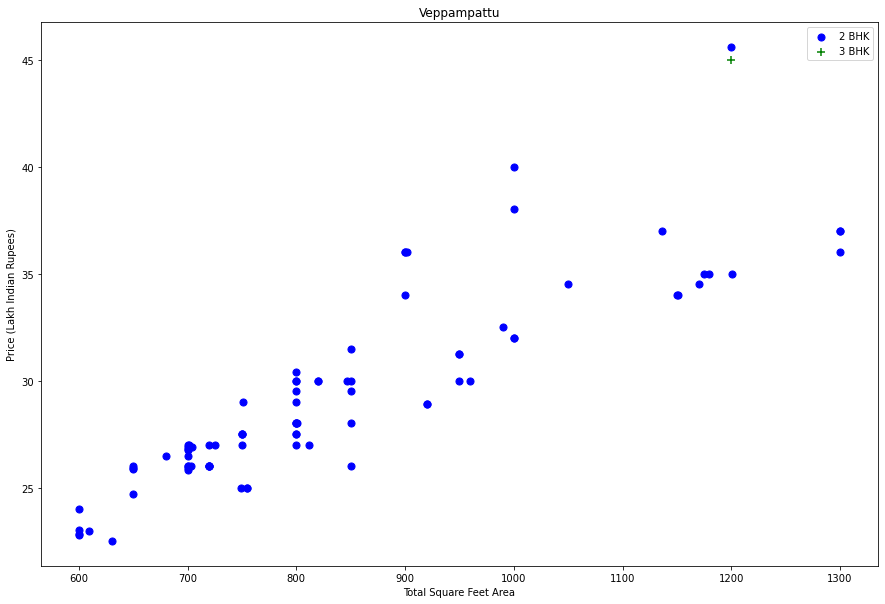

In [43]:
plot_scatter_chart(df3,"Veppampattu")

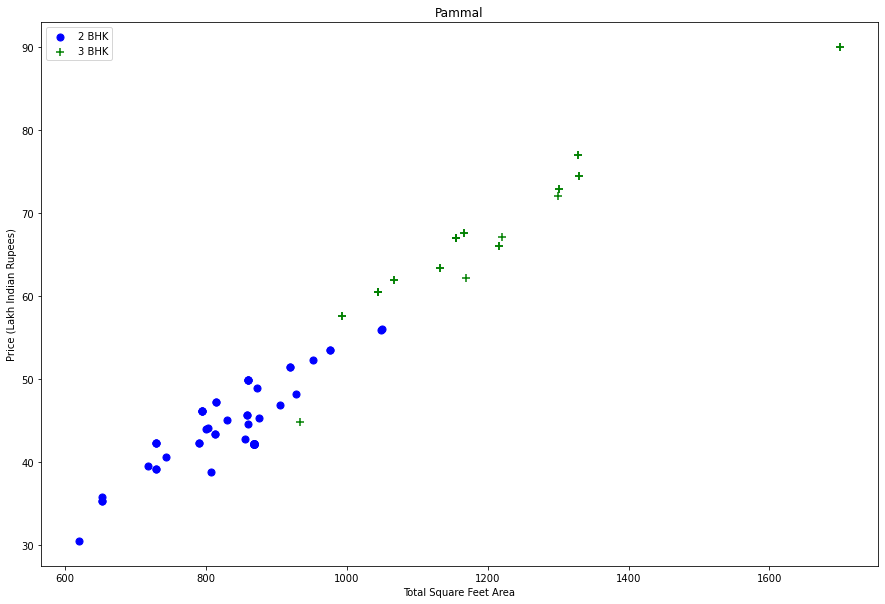

In [44]:
plot_scatter_chart(df3,"Pammal")

In [45]:
# Removing Outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(1592, 9)

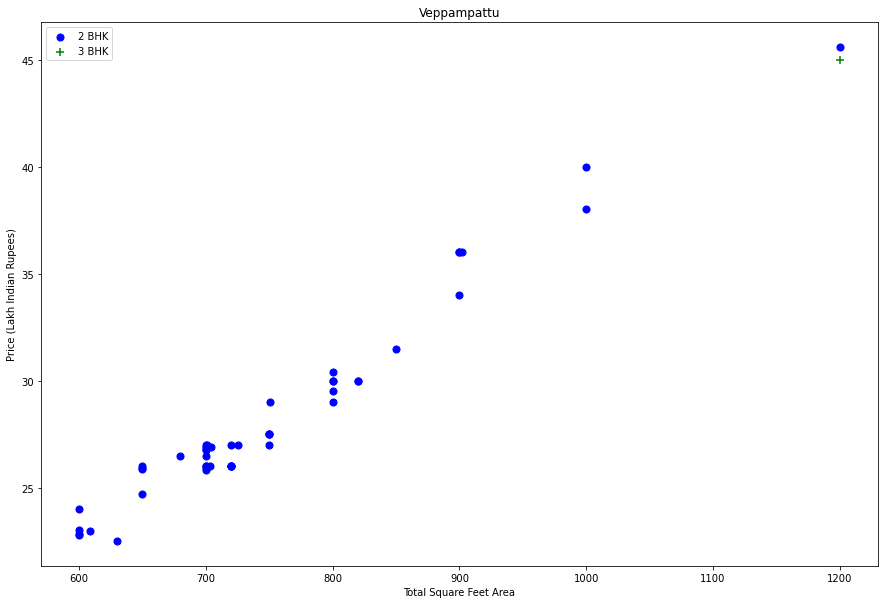

In [46]:
plot_scatter_chart(df4,"Veppampattu")

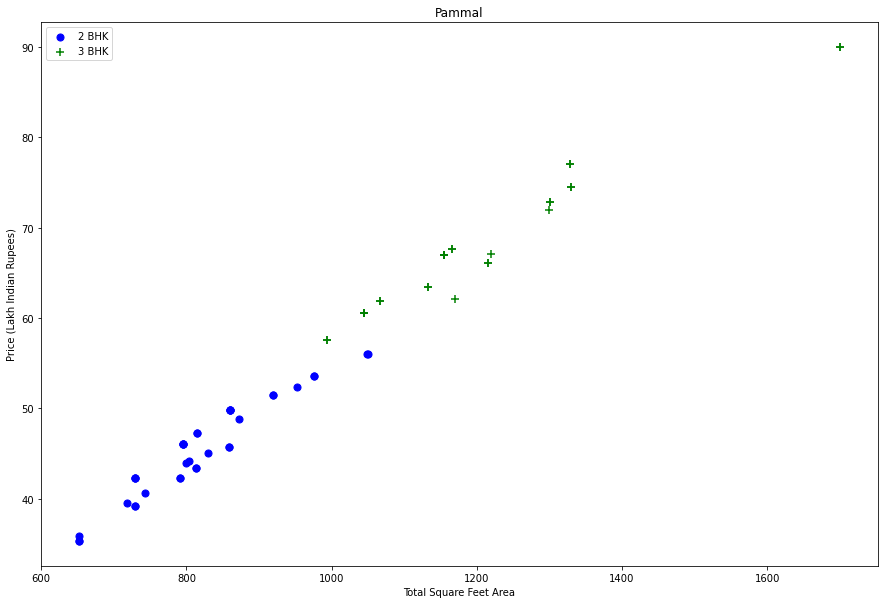

In [47]:
plot_scatter_chart(df4,"Pammal")

Text(0, 0.5, 'Count')

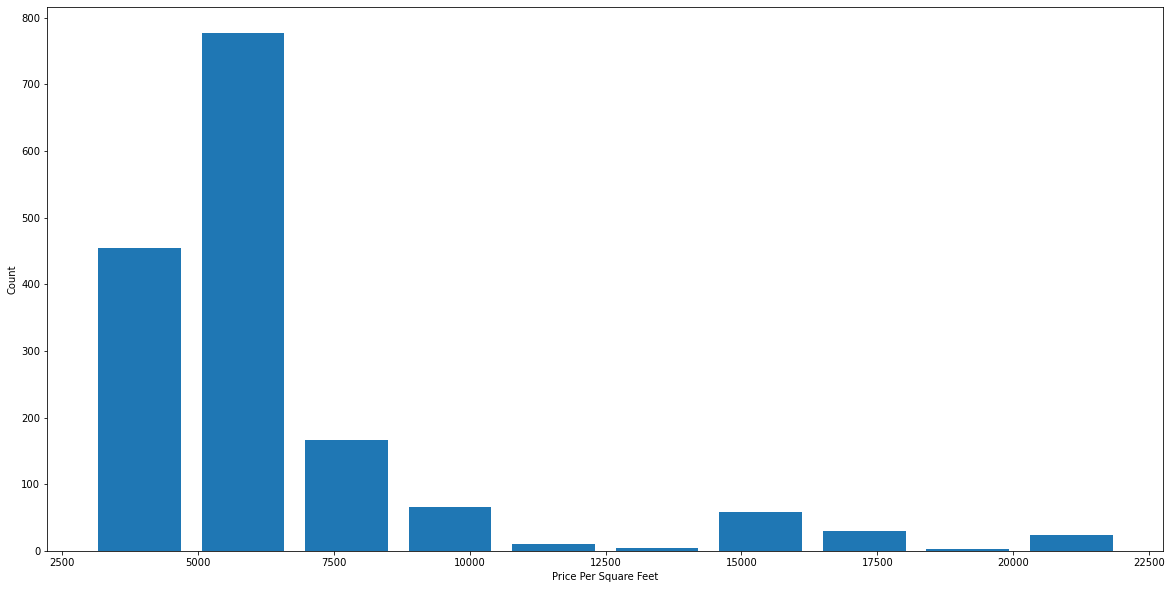

In [48]:
# Plooting price sq feet count
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

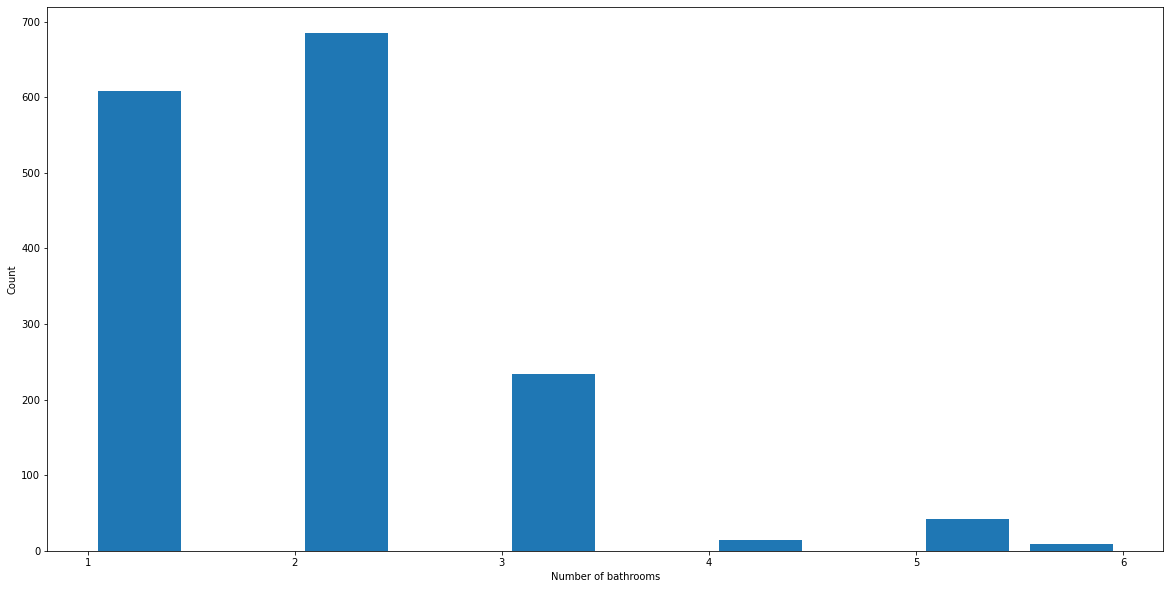

In [49]:
# Plotting bathroom count
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [50]:
df4.head()

,price,area,status,bhk,location,builder,bath,year,price_per_sqft
0,261.0,1548,Ready to move,3,Adyar,other,2.0,1.0,16860.465116
1,278.0,1652,Ready to move,3,Adyar,other,2.0,1.0,16828.087167
2,274.0,1627,Ready to move,3,Adyar,other,2.0,1.0,16840.811309
3,210.0,1381,Under Construction,3,Adyar,seller,3.0,0.0,15206.372194
6,230.0,1755,Under Construction,3,Adyar,HomeFirst,3.0,0.0,13105.413105


In [51]:
df5 = df4.drop(['price_per_sqft'],axis='columns')
df5.head()

,price,area,status,bhk,location,builder,bath,year
0,261.0,1548,Ready to move,3,Adyar,other,2.0,1.0
1,278.0,1652,Ready to move,3,Adyar,other,2.0,1.0
2,274.0,1627,Ready to move,3,Adyar,other,2.0,1.0
3,210.0,1381,Under Construction,3,Adyar,seller,3.0,0.0
6,230.0,1755,Under Construction,3,Adyar,HomeFirst,3.0,0.0


In [52]:
# Changing text to binary data
dummies1 = pd.get_dummies(df5.location)
dummies2 = pd.get_dummies(df5.builder)

In [53]:
df5.drop(['status'],axis=1,inplace=True)

In [54]:
# Adding to the main dataframe
df5 = pd.concat(((df5,dummies1,dummies2)),axis=1)

In [55]:
df5.head()

,price,area,bhk,location,builder,bath,year,Adyar,Alwarpet,Ambattur,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,261.0,1548,3,Adyar,other,2.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,278.0,1652,3,Adyar,other,2.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,274.0,1627,3,Adyar,other,2.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,210.0,1381,3,Adyar,seller,3.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,230.0,1755,3,Adyar,HomeFirst,3.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Dropping the columns whose value is changed
df5.drop(['location','builder'],axis=1,inplace=True)

In [57]:
df5.head()

,price,area,bhk,bath,year,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,261.0,1548,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,278.0,1652,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,274.0,1627,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,210.0,1381,3,3.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,230.0,1755,3,3.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = df5.drop(['price'],axis=1)
X.head()

,area,bhk,bath,year,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,1548,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1652,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1627,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1381,3,3.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1755,3,3.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X.shape

(1592, 119)

In [60]:
y = df5.price
y.head()

0    261.0
1    278.0
2    274.0
3    210.0
6    230.0
Name: price, dtype: float64

In [61]:
len(y)

1592

In [62]:
# Splitting for test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
# Implementing Liner Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9467567981552489

In [64]:
# Function to predict price
def predict_price(location,builder,sqft,bath,bhk,year):    
    loc_index = np.where(X.columns==location)[0][0]
    builder_index = np.where(X.columns==builder)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    x[3] = year
    if loc_index >= 0:
        x[loc_index] = 1
    if builder_index >= 0:
        x[builder_index] = 1

    return lr_clf.predict([x])[0]

In [65]:
predict_price('Pammal','MC Foundation',1000, 2, 2, 1)

64.76506051272864

In [66]:
predict_price('Pammal','seller',1000, 3, 3, 1)

49.25303491211624

In [67]:
predict_price('Pammal','Appaswamy Real Estate',2000, 3, 3, 5)

143.81285420997077

In [68]:
predict_price('Veppampattu','Propsource Realty Private Limited',1000, 3, 3, 0)

10.021463114308162

In [69]:
predict_price('Veppampattu','Radiance Realty Developers',2000, 3, 3, 2)

143.87373179969805